# Introducción al machine learning

**API 4**

**Alumno**: Hector Vergara ([LinkedIn](https://www.linkedin.com/in/hector-vergara/))

**Repositorio**: [GitHub](https://github.com/hhvergara/teclab_intro_ml)

## Situación
nteriormente, trabajamos con temas relacionados al aprendizaje
supervisado, el cual tiene la particularidad de contar con etiquetas de salida
para realizar las predicciones de datos del Titanic.

En esta ocasión, nos enfrentamos al desafío de generar predicciones de tipo
no supervisado, por lo cual no contamos con una variable de salida objetivo.

Para  ello,  tendremos  como  foco  la  agrupación  de  datos  que  cumplan  con
patrones similares y que nos permitan tomar decisiones a posteriori.
En  este  caso,  el  “Vivero  de  San  Juan”  necesita  realizar  un  estudio  que  le
permita clasificar su nueva flor del iris dentro del vivero, y para ello se han
solicitado nuestra ayuda.

Iris es un género de plantas rizomatosas de la familia Iridaceae. Constituye el
mayor  género  de  la  familia,  con  más  de  300  especies,  además  de  muchos
híbridos y cultivares. Además del nombre del género, iris se usa comúnmente
para referirse a todas las especies, así como a otros varios géneros
estrechamente emparentados y a una subdivisión dentro del género.

La  flor  del  iris  es  de  especial  interés  como  ejemplo  de  la  relación  entre  las
plantas florales y los insectos polinizadores. La forma de la flor y la posición
de los receptores del polen y los estigmas en los pétalos exteriores forman
una pista de aterrizaje para un insecto volador, el cual, al sondear el néctar,
entrará primero en contacto con el periantio y después con los tres
estambres sobre una superficie en espiral que nace en el ovario formado por
los tres carpelos.

La proyección transversal en forma de repisa sobre la espiral interior, situada
a los lados de los estambres y por debajo el estilo arqueado bajo el estigma,

permite que el insecto entre en contacto con la superficie cubierta de polen
solamente tras pasar este, mientras que, al salir de la flor, toma contacto con
la  cara  inferior  no  receptiva  del  estigma.  De  este  modo,  un  insecto  que
transporte polen de una flor visitada anteriormente y entre en otra,
depositará el polen sobre el estigma y, cuando salga de ella, el polen que lleva
no se frotará ni se quedará adherido al estigma de la misma flor.

## Consignas

El desafío actual consiste en poder generar agrupaciones mediante K-means
que permitan calcular el grado de precisión de una predicción no
supervisada. Para ello, nos solicitan analizar la base de datos de la flor del iris
y clasificar información según el orden que se presenta a continuación.

1. Debemos  describir  brevemente  la  información  que  nos  entrega  la
base  de  datos.  Para  ello,  puede  ser  útil  cargar  la  base  mediante  el
siguiente código:


```python
from sklearn import datasets
iris = datasets.load_iris()
```

2. Ahora, debemos graficar las relaciones con las cuales buscaremos realizar
el agrupamiento de clusters (por ejemplo, largo del sépalo versus ancho del
sépalo).

3. Lo siguiente es entrenar el modelo y determinar los centros de cada cluster,
su inercia y etiqueta.

4. Debemos, además, graficar los clusters.

5. Por último, mediante el método del codo, determinemos cuál es el número
de clusters ideales para realizar la agrupación.

In [1]:
# 💡Importamos las librerías necesarias:

import os
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from typing import Optional
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score


In [2]:
__version__ = '0.0.1'
__email__ = 'hhvservice@gmail.com'
__author__ = 'Hector Vergara'
__annotations__ = 'https://www.linkedin.com/in/hector-vergara/'
__base_dir__ = Path().absolute()
__data_dir__ = os.path.join(__base_dir__, 'data', 'API4')
img_setosa = os.path.join(__data_dir__, 'setosa.jpg')
img_virginica = os.path.join(__data_dir__, 'virginica.jpg')
img_versicolor = os.path.join(__data_dir__, 'versicolor.jpg')


### 💡 1. Debemos  describir  brevemente  la  información  que  nos  entrega  la base  de  datos.

In [3]:
# Cargamos el dataset y describimos su contenido:
iris_dataset = load_iris()

df_iris = pd.DataFrame(iris_dataset.data, columns = iris_dataset.feature_names)
df_iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Porcentaje de datos nulos por columna:
100 * (df_iris.isnull().sum() / df_iris.shape[0])

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

📎 Todos los datos del dataset son numericos, y estan limpios de valores nulos, por lo que consideramos que el preprocesamiento de datos está completo

In [5]:
class ScatterFigElement:
    def __init__(self, x, y, color: str, marker: str, edgecolor: str, title: str):
        self.x = x
        self.y = y
        self.color = color
        self.marker = marker
        self.edgecolor = edgecolor
        self.title = title

    def to_dict(self, exclude: Optional[str] = None):
        data = {
            "x": self.x,
            "y": self.y,
            "color": self.color,
            "marker": self.marker,
            "edgecolor": self.edgecolor,
            "title": self.title,
        }
        if exclude:
            data.pop(exclude)
        return data

### 💡 2. Ahora, debemos graficar las relaciones con las cuales buscaremos realizar el agrupamiento de clusters (por ejemplo, largo del sépalo versus ancho del sépalo).

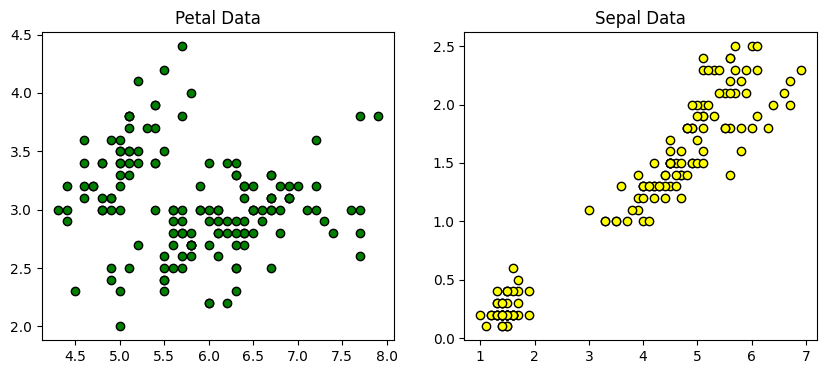

In [6]:
petal_fig_data = ScatterFigElement(
    x=df_iris.iloc[:, 0],
    y=df_iris.iloc[:,1],
    color='green',
    marker='o',
    edgecolor='black',
    title='Petal Data',
)
sepal_fig_data = ScatterFigElement(
    x=df_iris.iloc[:, 2],
    y=df_iris.iloc[:,3],
    color='yellow',
    marker='o',
    edgecolor='black',
    title='Sepal Data',
)
to_plot = [petal_fig_data, sepal_fig_data]

fig, ax = plt.subplots(1,2, figsize=(10, 4))
for i, figure in enumerate(to_plot):
    ax[i].scatter(**figure.to_dict(exclude='title'))
    ax[i].set_title(figure.title)


📎 A simple vista, el grupo de datos de sepal parece tener 2 grupos bien marcados, pero el grupo de petal es un conjunto de datos mucho más cercano, entre 1 y 2 grupos, por lo tanto, podemos decir que tenemos entre 3 y 4 clusters como primera aproximación.

### 💡 3. Lo siguiente es entrenar el modelo y determinar los centros de cada cluster, su inercia y etiqueta.

Para definir la cantidad de clusters utilizaremos el método del codo, que acumula la inercia de las distancias de los datos para encontrar el mejor número de clusters, cuando esta inercia deje de ser significativa.

In [7]:
# Normalizamos los datos para llevarlos a valores de entre 0 y 1, para evitar el sesgo del modelo:
scaler = StandardScaler()
df_iris_scaled = scaler.fit_transform(df_iris)

# Determinar la suma de las distancias cuadradas (inercia) para diferentes números de clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_iris_scaled)
    inertia.append(kmeans.inertia_)

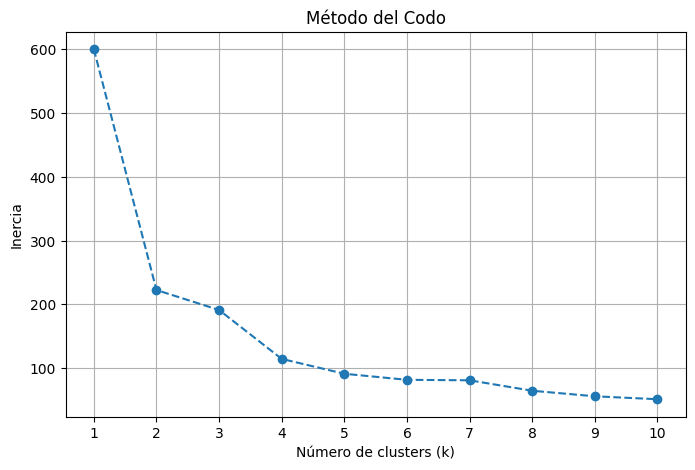

In [8]:
# Visualizar la curva del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid()
plt.show()

Realizaremos un plot con una mirada mas cercana entre 1 y 5 clusters para ver la reducción de inercia:

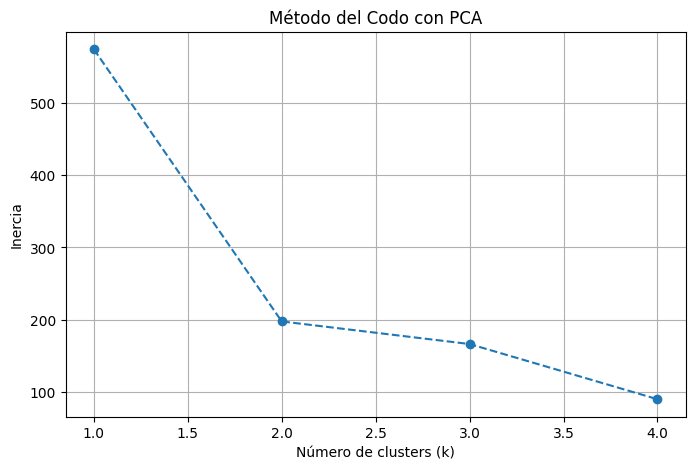

In [9]:
pca = PCA(n_components=2)
df_iris_pca = pca.fit_transform(df_iris_scaled)

# Ajuste KMeans para diferentes valores de k
k_range = range(1,5)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_iris_pca)
    inertia.append(kmeans.inertia_)

# Gráfico del Scree plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Método del Codo con PCA')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.grid()
plt.show()

Según el grafico, vemos que el numero de clusters está entre 3 y 4, como ya habíamos dicho en el análisis visual previo, esto nos dice que estamos en el camino correcto, ahora vamos a realizar un gráfico de silhouette para comparar entre 1 y 5 clusteres, cual es el de mayor Coeficiente de Silhouette, y utilizaremos este numero de clusters como el indicado para nuestro modelo.

In [10]:
# Número de clusters de prueba:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(df_iris_scaled)

# Calcular el índice silhouette para cada punto
silhouette_vals = silhouette_samples(df_iris_scaled, cluster_labels)
silhouette_avg = silhouette_score(df_iris_scaled, cluster_labels)

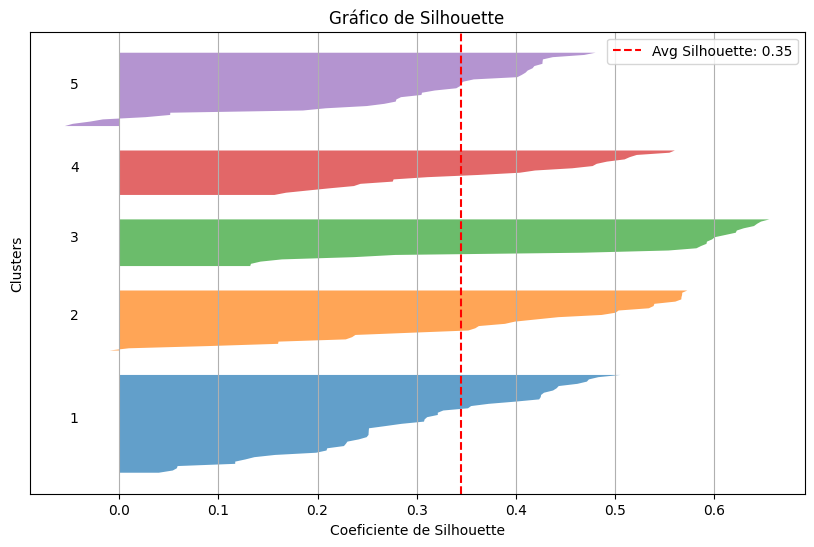

In [11]:
# Visualizar el gráfico de silhouette
plt.figure(figsize=(10, 6))
y_lower = 10

for i in range(n_clusters):
    # Silhouette values para cada cluster
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()
    cluster_size = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + cluster_size

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * cluster_size, str(i + 1))
    y_lower = y_upper + 10

plt.axvline(silhouette_avg, color="red", linestyle="--", label=f'Avg Silhouette: {silhouette_avg:.2f}')
plt.title("Gráfico de Silhouette")
plt.xlabel("Coeficiente de Silhouette")
plt.ylabel("Clusters")
plt.yticks([])
plt.legend()
plt.grid()
plt.show()


#### Conclusión de esta parte:

**Método del codo**: El método del codo está basado en la inercia, es decir, la suma de las distancias cuadradas de los puntos a sus respectivos centroides. Este valor sigue disminuyendo a medida que aumentas el número de clusters, pero la disminución de la inercia se va volviendo menos pronunciada después de cierto número de clusters (en este caso, entre 3 y 4). Esto indica que agregar más clusters no mejora significativamente la calidad del modelo, pero aún reduce algo la inercia.

**Índice de silhouette**: El silhouette score es una medida de la cohesión dentro de los clusters y la separación entre ellos. Aunque la inercia sigue disminuyendo con más clusters, un silhouette score promedio más alto para 3 clusters **indica que 3 clusters son los que mejor balancean la cohesión interna y la separación entre los clusters**.

### 💡 4. Debemos, además, graficar los clusters

Para graficar los clusters, obtendremos los centroides y a partir de ellos, los utilizaremos para visualizar los datos cercanos en los 3 grupos: 

In [12]:
palette = 'Spectral'
marker_color = 'black'
n_clusters = 3

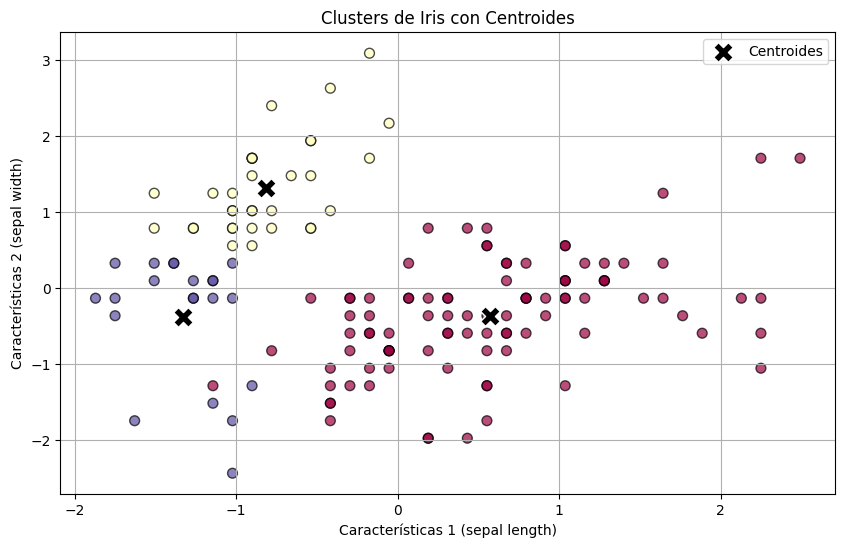

In [13]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(df_iris_scaled)

# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

# Graficar los puntos de datos con sus etiquetas de clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_iris_scaled[:, 0], df_iris_scaled[:, 1], c=cluster_labels, cmap=palette, marker='o', s=50, alpha=0.7, edgecolor='k')

# Graficar los centroides
plt.scatter(centroids[:, 0], centroids[:, 1], c=marker_color, marker='X', s=200, label='Centroides', edgecolor='white')

# Añadir etiquetas y leyenda
plt.title("Clusters de Iris con Centroides")
plt.xlabel("Características 1 (sepal length)")
plt.ylabel("Características 2 (sepal width)")
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()


### ❌ El gráfico no hace sentido a los grupos que identificamos visualmente, por ello, vamos a reducir la dimensionalidad del dataset, con el objetivo de lograr una mejor coherencia en el gráfico.

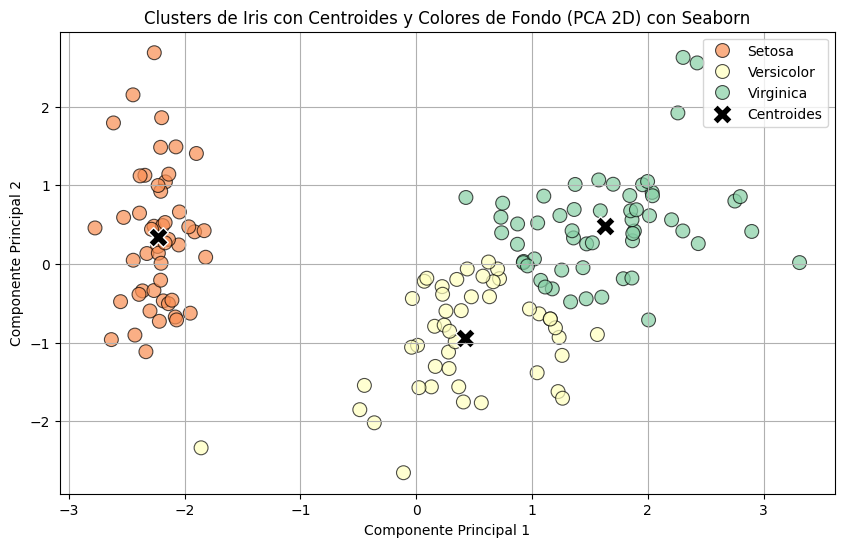

In [14]:
X = iris_dataset.data
scaler = StandardScaler()
df_iris_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = kmeans.fit_predict(df_iris_scaled)

# Reducir la dimensionalidad a 2 dimensiones utilizando PCA
pca = PCA(n_components=2)
df_iris_pca = pca.fit_transform(df_iris_scaled)

# Obtener los centroides de los clusters en el espacio reducido
centroids = pca.transform(kmeans.cluster_centers_)

# Crear una malla de puntos para la visualización del fondo
x_min, x_max = df_iris_pca[:, 0].min() - 1, df_iris_pca[:, 0].max() + 1
y_min, y_max = df_iris_pca[:, 1].min() - 1, df_iris_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

# Predecir los labels de la malla de puntos para cada celda (lo que determina el color de fondo)
Z = kmeans.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Crear el gráfico de contorno con Seaborn
plt.figure(figsize=(10, 6))

# Dibuja los contornos de los clusters en el fondo con Seaborn
names = [ 'Virginica', 'Setosa','Versicolor']
hue = [ names[i] for i in cluster_labels]
sns.scatterplot(x=df_iris_pca[:, 0], y=df_iris_pca[:, 1], hue=hue, palette=palette, s=100, edgecolor='k', alpha=0.7)

# Graficar los centroides en 2D
plt.scatter(centroids[:, 0], centroids[:, 1], c=marker_color, marker='X', s=200, label='Centroides', edgecolor='white')

# Añadir etiquetas y leyenda
plt.title("Clusters de Iris con Centroides y Colores de Fondo (PCA 2D) con Seaborn")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()


### ✅ Ahora el gráfico tiene más sentido, los grupos quedan mucho mejor definidos.

Vamos a realizar un gráfico mejor, determinando el área correspondiente para cada clúster:

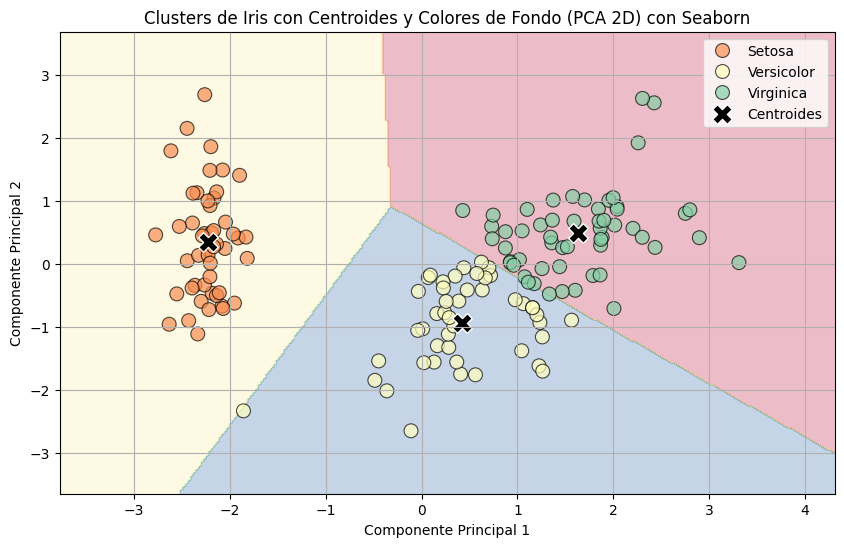

In [15]:
plt.figure(figsize=(10, 6))

# Creamos el gráfico de fondo con `matplotlib` (contorno de los clusters)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=palette)

# Graficamos los puntos de datos con Seaborn
sns.scatterplot(x=df_iris_pca[:, 0], y=df_iris_pca[:, 1], hue=hue, palette=palette, s=100, edgecolor='k', alpha=0.7)

# Graficamos los centroides en 2D
plt.scatter(centroids[:, 0], centroids[:, 1], c=marker_color, marker='X', s=200, label='Centroides', edgecolor='white')

# Añadir etiquetas y leyenda
plt.title("Clusters de Iris con Centroides y Colores de Fondo (PCA 2D) con Seaborn")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.grid(True)

plt.show()


Y por último, un gráfico en 3D de la separación de estos clusters:

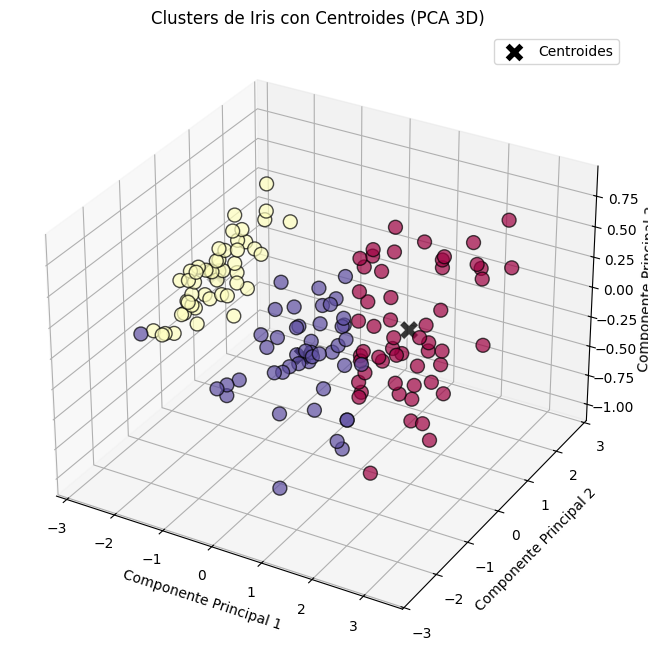

In [16]:
kmeans = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = kmeans.fit_predict(df_iris_scaled)

# Reducir la dimensionalidad a 3 dimensiones utilizando PCA
pca = PCA(n_components=3)
df_iris_pca = pca.fit_transform(df_iris_scaled)

# Obtener los centroides de los clusters en el espacio reducido
centroids = pca.transform(kmeans.cluster_centers_)

# Crear la figura para 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos de datos con sus etiquetas de clusters
ax.scatter(df_iris_pca[:, 0], df_iris_pca[:, 1], df_iris_pca[:, 2], c=cluster_labels, cmap=palette, s=100, edgecolor='k', alpha=0.7)

# Graficar los centroides en 3D
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c=marker_color, marker='X', s=200, label='Centroides', edgecolor='white')

# Añadir etiquetas y leyenda
ax.set_title("Clusters de Iris con Centroides (PCA 3D)")
ax.set_xlabel("Componente Principal 1")
ax.set_ylabel("Componente Principal 2")
ax.set_zlabel("Componente Principal 3")
ax.legend()

# Mostrar gráfico
plt.show()


### 💡5. Por último, mediante el método del codo, determinemos cuál es el número de clusters ideales para realizar la agrupación.
Como vimos anteriormente, aplicamos el método del codo en 2 oportunidades para determinar el mejor número de clusters, que quedó determinado en 3.

### 💡Predicción
Ahora con nuestro modelo terminado, podemos predecir a qué familia pertenece una  nueva muestra de datos

In [17]:
# Nueva muestra para predecir (por ejemplo, medidas de una nueva flor)
# Las dimensiones deben coincidir con las del dataset original
NEW_SAMPLE = np.array([[5.0, 3.4, 1.5, 0.2]])


La nueva muestra pertenece a la familia:


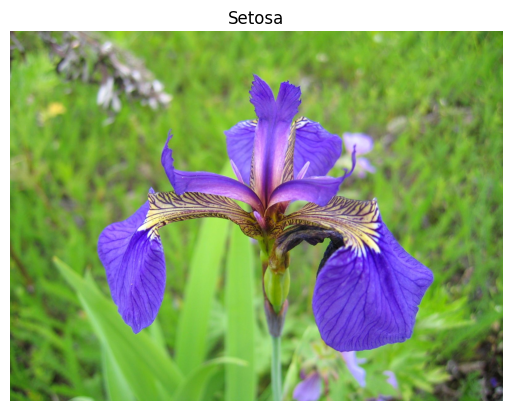

In [ ]:
# Cargar el dataset iris desde cero:
df_iris = load_iris()
X = df_iris.data
scaler = StandardScaler()

# Utilizando 3 clusters, normalizamos y realizamos la predicción sobre la nueva muestra:
n_clusters = 3
df_iris_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=n_clusters, random_state=10)
kmeans.fit(df_iris_scaled)
scaled_new_sample = scaler.transform(NEW_SAMPLE)
predicted_cluster = kmeans.predict(scaled_new_sample)

# Mostrar el resultado
name = names[predicted_cluster[0]]
image_path = os.path.join(__data_dir__, f'{name.lower()}.jpg')
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.title(name)

print(f"La nueva muestra pertenece a la familia:")
plt.show()
